<a href="https://colab.research.google.com/github/alexrafkin/simpsons_facial_recognition/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import PIL
from PIL import Image
import glob
import numpy as np
from numpy import asarray

In [ ]:
import os
os.chdir("drive/My Drive/Thinkful/Simpsons")

#Original Processing

In [ ]:
X_train = []
Y_train = []
X_test = []
Y_test = []

In [ ]:
for folderpath in glob.iglob('/content/drive/MyDrive/Thinkful/Simpsons/simpsons_testset/*', recursive=True):
  #print(folderpath)
  for filepath in glob.iglob(folderpath + '/*.jpg'):
    split = filepath.split('/')
    character = split[7]
    #print(character)
    #print(filepath)

    # load the image
    image = Image.open(filepath)
    # resize the image to be the same as all the other images
    image = image.resize((100,100))
    # convert image to numpy array
    data = asarray(image)
    # summarize shape
    data = np.reshape(data,(1,10000,3))[0]

    X_test.append(data)
    Y_test.append(character)
  print(character)

sideshow_bob
moe_szyslak
charles_montgomery_burns
milhouse_van_houten
lenny_leonard
edna_krabappel
chief_wiggum
ned_flanders
abraham_grampa_simpson
krusty_the_clown
kent_brockman
bart_simpson
homer_simpson
comic_book_guy
mayor_quimby
apu_nahasapeemapetilon
lisa_simpson
principal_skinner
marge_simpson
nelson_muntz


In [ ]:
np.save('X_test.npy', X_test) # saving the X_test array to the drive
np.save('Y_test.npy', Y_test) # saving the Y_test array to the drive

In [ ]:
for folderpath in glob.iglob('/content/drive/MyDrive/Thinkful/Simpsons/simpsons_trainingset/*', recursive=True):
  #print(folderpath)
  for filepath in glob.iglob(folderpath + '/*.jpg'):
    split = filepath.split('/')
    character = split[7]
    #print(character)
    #print(filepath)

    # load the image
    image = Image.open(filepath)
    # resize the image to be the same as all the other images
    image = image.resize((100,100))
    # convert image to numpy array
    data = asarray(image)
    # summarize shape
    data = np.reshape(data,(1,10000,3))[0]

    X_train.append(data)
    Y_train.append(character)
  print(character)

charles_montgomery_burns
chief_wiggum
lenny_leonard
milhouse_van_houten
sideshow_bob
moe_szyslak
edna_krabappel
abraham_grampa_simpson
krusty_the_clown
marge_simpson
ned_flanders
apu_nahasapeemapetilon
comic_book_guy
nelson_muntz
mayor_quimby
kent_brockman
principal_skinner
homer_simpson
lisa_simpson
bart_simpson


In [ ]:
np.save('X_train.npy', X_train) # saving the X_train array to the drive
np.save('Y_train.npy', Y_train) # saving the Y_train array to the drive

#Other pre-processing stuff

In [ ]:
X_test[0]

array([[ 48, 149, 221],
       [ 60, 146, 208],
       [ 92, 153, 196],
       ...,
       [171, 160, 147],
       [170, 159, 146],
       [170, 159, 146]], dtype=uint8)

In [ ]:
Y_test_str[0]

'sideshow_bob'

In [ ]:
X_test = np.load('X_test.npy')
Y_test_str = np.load('Y_test.npy')

In [ ]:
X_train = np.load('X_train.npy')
Y_train_str = np.load('Y_train.npy')

In [ ]:
X_train = X_train.reshape(X_train.shape[0],100,100,3)
X_test = X_test.reshape(X_test.shape[0],100,100,3)
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255

Reshaping the data to be 100x100x3 format - this is what we will feed into the CNN model. We are also normalizing the RGB values to be between 0 and 1 instead of 0 and 255.

In [ ]:
characters = {'abraham_grampa_simpson' : 0, 'apu_nahasapeemapetilon' : 1, 'bart_simpson' : 2, 
        'charles_montgomery_burns' : 3, 'chief_wiggum' : 4, 'comic_book_guy' : 5, 'edna_krabappel' : 6, 
        'homer_simpson' : 7, 'kent_brockman' : 8, 'krusty_the_clown' : 9, 'lenny_leonard' : 10, 'lisa_simpson' : 11, 
        'marge_simpson' : 12, 'mayor_quimby' : 13, 'milhouse_van_houten' : 14, 'moe_szyslak' : 15, 
        'ned_flanders' : 16, 'nelson_muntz' : 17, 'principal_skinner' : 18, 'sideshow_bob' : 19}

In [ ]:
characters_r = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lenny_leonard', 11: 'lisa_simpson', 
        12: 'marge_simpson', 13: 'mayor_quimby', 14: 'milhouse_van_houten', 15: 'moe_szyslak', 
        16: 'ned_flanders', 17: 'nelson_muntz', 18: 'principal_skinner', 19: 'sideshow_bob'}

Building two dictionaries we will use to reference the characters and their associated indicies.

In [ ]:
import matplotlib.pyplot as plt


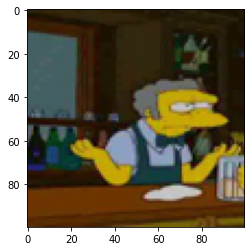

In [ ]:
plt.imshow(X_test[54])

In [ ]:
Y_test_str[60]

'moe_szyslak'

In [ ]:
Y_test_str[0]

'sideshow_bob'

In [ ]:
Y_test = np.array(characters[Y_test_str[0]])
Y_train = np.array(characters[Y_train_str[0]])

In [ ]:
Y_test

array(19)

In [ ]:
for i in Y_test_str[1:]:
  Y_test = np.append(Y_test, characters[i])

In [ ]:
for i in Y_train_str[1:]:
  Y_train = np.append(Y_train, characters[i])

Since our Y values are in string format, we needed to reformat them to be integer values, and we will soon have to turn them into dummy variables to feed into the CNN.

In [ ]:
#np.save('X_train_FINAL.npy', X_train) # saving the X_train array to the drive
#np.save('Y_train_FINAL.npy', Y_train) # saving the Y_train array to the drive

In [ ]:
#np.save('X_test_FINAL.npy', X_test) # saving the X_train array to the drive
#np.save('Y_test_FINAL.npy', Y_test) # saving the Y_train array to the drive

In [ ]:
X = np.concatenate((X_train, X_test))
Y = np.concatenate((Y_train, Y_test))

In [ ]:
print(X.shape)
print(Y.shape)

(20548, 100, 100, 3)
(20548,)


In [ ]:
#np.save('X_TOTAL.npy', X) # saving the X_train array to the drive
#np.save('Y_TOTAL.npy', Y) # saving the Y_train array to the drive

This is the total data.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=69)

In [ ]:
np.save('x_train_FINAL.npy', x_train) # saving the X_train array to the drive
np.save('y_train_FINAL.npy', y_train) # saving the Y_train array to the drive

In [ ]:
np.save('x_test_FINAL.npy', x_test) # saving the X_train array to the drive
np.save('y_test_FINAL.npy', y_test) # saving the Y_train array to the drive

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.1, random_state=563)
np.save('x_train_meta.npy', x_train2) # saving the X_train array to the drive
np.save('y_train_meta.npy', y_train2) # saving the Y_train array to the drive
np.save('x_test_meta.npy', x_test2) # saving the X_train array to the drive
np.save('y_test_meta.npy', y_test2) # saving the Y_train array to the drive